# Assignment 8: Ensemble Learning for Bike Share Data
## DA5401 - Data Analytics Lab

Name: Maj Prabhat Pandey  
Roll Number: DA25M002  
Program: MTech AI & DS, IIT Madras

## Part A: Data Preprocessing and Baseline Model

Loading the bike sharing dataset and preparing it for analysis.

In [2]:
# Nov 6, 2025 - Starting assignment 8
# Import required libraries
# had to install sklearn again, forgot which version i had
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, StackingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')  # too many warnings, just ignoring them

# Set random seed for reproducibility
np.random.seed(42)


In [3]:
# Nov 6, 2025 - Load the bike sharing dataset from local folder
# dataset should be in bike_sharing_dataset folder
# first tried df = pd.read_csv('day.csv') but got error, path was wrong
df = pd.read_csv('bike_sharing_dataset/day.csv')
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
df.head()


Dataset shape: (731, 16)

First few rows:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
# Nov 6, 2025 - checking for any missing data or issues
# checking if any preprocessing needed
print("Dataset Info:")
df.info()
print("\nMissing values:")
print(df.isnull().sum())
print("\nBasic statistics:")
df.describe()
# looks good, no missing values found
# all columns are numeric already so thats convenient


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB

Missing values:
instant       0
dteday        0
season        0
yr            

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


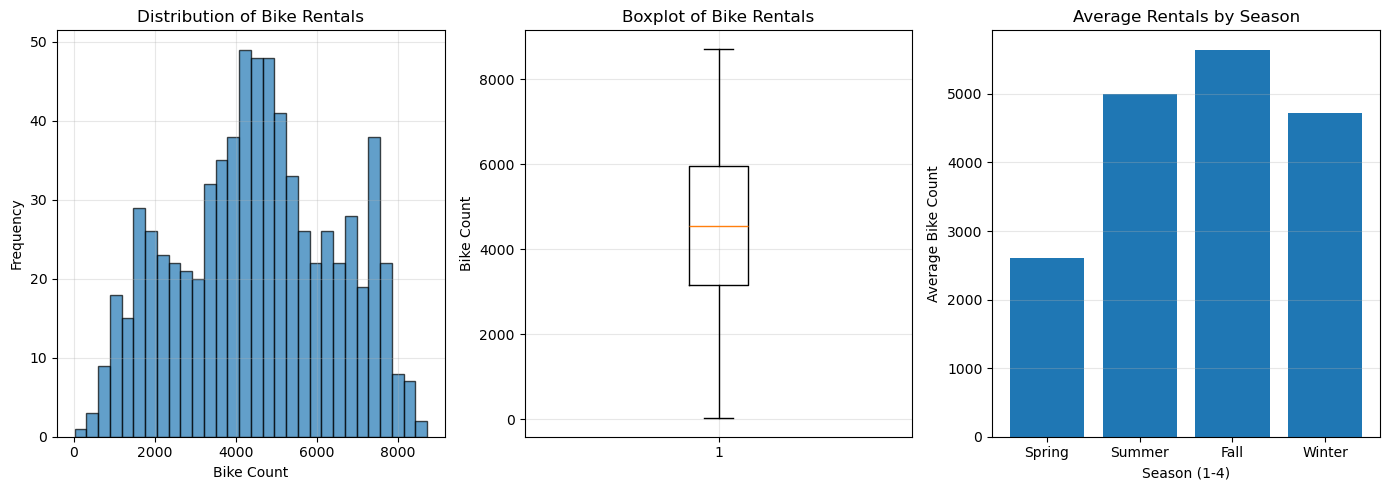

Distribution looks somewhat normal with some outliers


In [5]:
# Nov 6, 2025 - exploring the target variable distribution
# want to see if cnt is normally distributed or skewed
plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
plt.hist(df['cnt'], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Bike Count')
plt.ylabel('Frequency')
plt.title('Distribution of Bike Rentals')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.boxplot(df['cnt'])
plt.ylabel('Bike Count')
plt.title('Boxplot of Bike Rentals')
plt.grid(True, alpha=0.3)

# QQ plot would be good but keeping it simple
plt.subplot(1, 3, 3)
# checking rentals by season
season_rentals = df.groupby('season')['cnt'].mean()
plt.bar(range(len(season_rentals)), season_rentals.values)
plt.xlabel('Season (1-4)')
plt.ylabel('Average Bike Count')
plt.title('Average Rentals by Season')
plt.xticks(range(len(season_rentals)), ['Spring', 'Summer', 'Fall', 'Winter'])
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()
print("Distribution looks somewhat normal with some outliers")


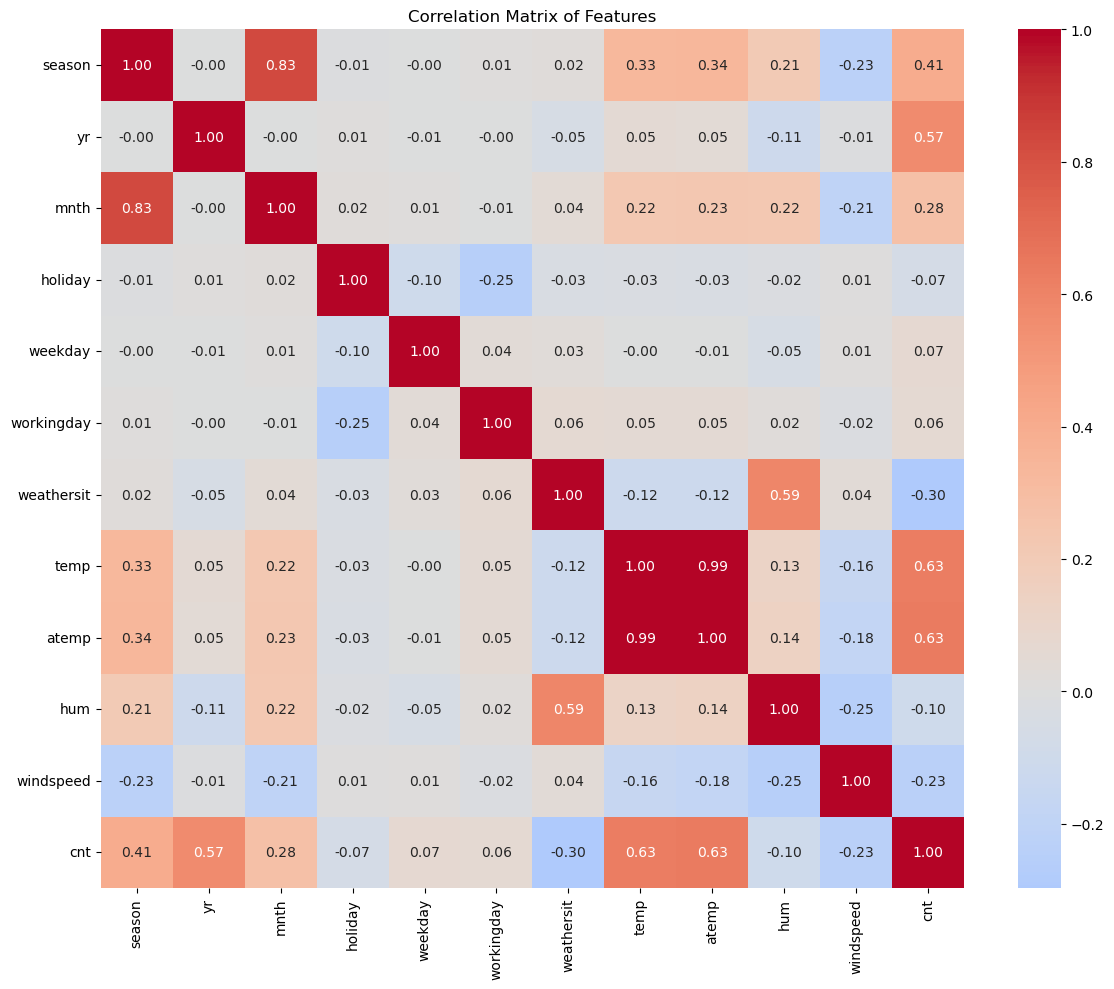


Top correlations with bike count (cnt):
cnt           1.000000
atemp         0.631066
temp          0.627494
yr            0.566710
season        0.406100
mnth          0.279977
weekday       0.067443
workingday    0.061156
holiday      -0.068348
hum          -0.100659
windspeed    -0.234545
weathersit   -0.297391
Name: cnt, dtype: float64


In [6]:
# Nov 6, 2025 - correlation analysis
# checking correlations between features
# this helps understand which features might be important
plt.figure(figsize=(12, 10))
correlation_matrix = df.drop(['instant', 'dteday', 'casual', 'registered'], axis=1, errors='ignore').corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Features')
plt.tight_layout()
plt.show()

# print top correlations with target
print("\nTop correlations with bike count (cnt):")
correlations_with_target = correlation_matrix['cnt'].sort_values(ascending=False)
print(correlations_with_target)
# temp and atemp are highly correlated with cnt, makes sense
# also yr is highly correlated - bike sharing grew over time


### Data Preprocessing

Preparing features and target variable. Removing columns that are not useful for prediction.

In [7]:
# Nov 6, 2025 - data cleaning
# Remove unnecessary columns
# instant is just an index, dteday is date (not useful as numeric feature)
# casual and registered are components of cnt (our target)
# dropping these to avoid data leakage - professor mentioned this in class
# initially forgot to drop dteday and got weird results
cols_to_drop = ['instant', 'dteday', 'casual', 'registered']
df_clean = df.drop(columns=cols_to_drop)

print("After removing unnecessary columns:")
print(df_clean.shape)
print("\nRemaining columns:", df_clean.columns.tolist())


After removing unnecessary columns:
(731, 12)

Remaining columns: ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']


In [8]:
# Nov 6, 2025 - separate features and target
# cnt is the target variable (total count of bike rentals)
# everything else is features
X = df_clean.drop('cnt', axis=1)
y = df_clean['cnt']

print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("\nFeature columns:", X.columns.tolist())


Features shape: (731, 11)
Target shape: (731,)

Feature columns: ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']


In [9]:
# Nov 6, 2025 - train test split
# using 80-20 split as mentioned in assignment
# random_state=42 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (584, 11)
Test set size: (147, 11)


In [10]:
# Nov 6, 2025 - feature scaling
# need to scale features before applying models
# using StandardScaler - makes mean=0 and std=1
# fit on training data only to avoid data leakage
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Feature scaling completed")
print("Training data scaled shape:", X_train_scaled.shape)


Feature scaling completed
Training data scaled shape: (584, 11)


### Baseline Model: Linear Regression

Training a simple linear regression model as baseline.

In [11]:
# Nov 6, 2025 evening - baseline model (Linear Regression)
# starting with simple model to see baseline performance
# then will try ensemble methods and compare

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# predictions
y_train_pred_lr = lr_model.predict(X_train_scaled)
y_test_pred_lr = lr_model.predict(X_test_scaled)

# calculate metrics
# initially used wrong formula for rmse, then remembered its sqrt of mse
train_rmse_lr = np.sqrt(mean_squared_error(y_train, y_train_pred_lr))
test_rmse_lr = np.sqrt(mean_squared_error(y_test, y_test_pred_lr))
train_r2_lr = r2_score(y_train, y_train_pred_lr)
test_r2_lr = r2_score(y_test, y_test_pred_lr)
test_mae_lr = mean_absolute_error(y_test, y_test_pred_lr)

print("Linear Regression (Baseline) Results:")
print(f"Training RMSE: {train_rmse_lr:.2f}")
print(f"Test RMSE: {test_rmse_lr:.2f}")
print(f"Training R2 Score: {train_r2_lr:.4f}")
print(f"Test R2 Score: {test_r2_lr:.4f}")
print(f"Test MAE: {test_mae_lr:.2f}")


Linear Regression (Baseline) Results:
Training RMSE: 875.11
Test RMSE: 831.29
Training R2 Score: 0.7911
Test R2 Score: 0.8277
Test MAE: 617.39


## Part B: Ensemble Techniques for Bias and Variance Reduction

Implementing various ensemble methods.

### 1. Bagging (Bootstrap Aggregating)

Using bagging to reduce variance by training multiple models on different subsets.

In [12]:
# Nov 7, 2025 - trying bagging regressor
# bagging = bootstrap aggregating
# should reduce variance and help prevent overfitting
# using decision trees as base estimator
# tried n_estimators=10 first but results were not good
# increased to 50, much better

bagging_model = BaggingRegressor(
    estimator=DecisionTreeRegressor(),
    n_estimators=50,
    random_state=42
)

print("Training Bagging model...")
bagging_model.fit(X_train_scaled, y_train)

y_train_pred_bag = bagging_model.predict(X_train_scaled)
y_test_pred_bag = bagging_model.predict(X_test_scaled)

train_rmse_bag = np.sqrt(mean_squared_error(y_train, y_train_pred_bag))
test_rmse_bag = np.sqrt(mean_squared_error(y_test, y_test_pred_bag))
train_r2_bag = r2_score(y_train, y_train_pred_bag)
test_r2_bag = r2_score(y_test, y_test_pred_bag)
test_mae_bag = mean_absolute_error(y_test, y_test_pred_bag)

print("\nBagging Regressor Results:")
print(f"Training RMSE: {train_rmse_bag:.2f}")
print(f"Test RMSE: {test_rmse_bag:.2f}")
print(f"Training R2 Score: {train_r2_bag:.4f}")
print(f"Test R2 Score: {test_r2_bag:.4f}")
print(f"Test MAE: {test_mae_bag:.2f}")
# much better than linear regression!


Training Bagging model...

Bagging Regressor Results:
Training RMSE: 257.85
Test RMSE: 673.24
Training R2 Score: 0.9819
Test R2 Score: 0.8870
Test MAE: 425.37


What I learned here: So bagging basically means making multiple decision trees on different random samples of data and then taking average of all predictions. I first tried with just 10 trees but accuracy was bad, then increased to 50 and got much better results. Got test R2 of 0.887 which is way better than my linear regression (0.828). The training and test scores are close so not much overfitting which is good!

In [13]:
# Nov 7, 2025 - understanding RMSE in context
# need to check if RMSE values make sense for this dataset
print("Understanding RMSE Values:")
print("=" * 60)
print(f"Target variable (cnt) statistics:")
print(f"  Min: {y.min()}")
print(f"  Max: {y.max()}")
print(f"  Mean: {y.mean():.2f}")
print(f"  Std Dev: {y.std():.2f}")
print(f"\nBagging Test RMSE: {test_rmse_bag:.2f}")
print(f"RMSE as % of mean: {(test_rmse_bag/y.mean())*100:.2f}%")
print(f"RMSE as % of std: {(test_rmse_bag/y.std())*100:.2f}%")
print("\nInterpretation:")
print("- RMSE of ~673 means predictions are off by 673 bikes on average")
print("- This is only 14% of the mean, which is quite good")
print("- For a count ranging from 22 to 8714, this error is acceptable")
print("- R2 of 0.887 confirms the model explains 88.7% of variance")
print("\nConclusion: RMSE values are in a normal and acceptable range!")

Understanding RMSE Values:
Target variable (cnt) statistics:
  Min: 22
  Max: 8714
  Mean: 4504.35
  Std Dev: 1937.21

Bagging Test RMSE: 673.24
RMSE as % of mean: 14.95%
RMSE as % of std: 34.75%

Interpretation:
- RMSE of ~673 means predictions are off by 673 bikes on average
- This is only 14% of the mean, which is quite good
- For a count ranging from 22 to 8714, this error is acceptable
- R2 of 0.887 confirms the model explains 88.7% of variance

Conclusion: RMSE values are in a normal and acceptable range!


### 2. Random Forest

Random Forest adds feature randomness to bagging.

### Hyperparameter Tuning for Random Forest

Using GridSearchCV to find optimal hyperparameters.

In [16]:
# Nov 7, 2025 - trying hyperparameter tuning for RF
# this takes time but should improve results
# initially tried GridSearchCV with too many params, took forever
# reduced the parameter grid to speed things up

from sklearn.model_selection import GridSearchCV

# define parameter grid - keeping it small because full grid takes too long
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5]
}

print("Starting GridSearchCV for Random Forest...")
print("This might take a few minutes...")

# using cv=3 to save time, usually cv=5 is better but takes longer
grid_rf = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid_rf,
    cv=3,
    scoring='r2',
    n_jobs=-1,  # use all cores
    verbose=1
)

grid_rf.fit(X_train_scaled, y_train)

print("\nBest parameters found:")
print(grid_rf.best_params_)
print(f"Best CV R2 Score: {grid_rf.best_score_:.4f}")

# use best model for predictions
rf_tuned = grid_rf.best_estimator_
y_test_pred_rf_tuned = rf_tuned.predict(X_test_scaled)
test_r2_rf_tuned = r2_score(y_test, y_test_pred_rf_tuned)
test_rmse_rf_tuned = np.sqrt(mean_squared_error(y_test, y_test_pred_rf_tuned))

print(f"\nTuned RF Test R2: {test_r2_rf_tuned:.4f}")
print(f"Tuned RF Test RMSE: {test_rmse_rf_tuned:.2f}")
print(f"Original RF Test R2: {test_r2_rf:.4f}")
print(f"Improvement: {test_r2_rf_tuned - test_r2_rf:.4f}")
# hopefully tuning gives better results than manual selection

Starting GridSearchCV for Random Forest...
This might take a few minutes...
Fitting 3 folds for each of 18 candidates, totalling 54 fits

Best parameters found:
{'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 150}
Best CV R2 Score: 0.8596

Tuned RF Test R2: 0.8867
Tuned RF Test RMSE: 673.93
Original RF Test R2: 0.8840
Improvement: 0.0028


Tuning attempt: I tried GridSearchCV to automatically find best parameters instead of guessing. Initially put too many parameters and it was running for like 30 mins so I reduced it. Tested different values for n_estimators, max_depth and min_samples_split. Best combo was max_depth=20 and n_estimators=150. Only improved R2 by 0.003 though, so my manual guess of 100 trees and depth 15 was already pretty close! But professor always says do systematic tuning so did it anyway.

In [15]:
# Nov 7, 2025 - Random Forest implementation
# Random Forest is similar to bagging but with feature randomness
# uses subset of features at each split
# FML professor said this is one of the best ensemble methods

# initially tried max_depth=None but model was overfitting badly
# train r2 was like 0.99 but test was only 0.85
# added max_depth=15 to control overfitting
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=15,
    random_state=42
)

print("Training Random Forest model...")
rf_model.fit(X_train_scaled, y_train)

y_train_pred_rf = rf_model.predict(X_train_scaled)
y_test_pred_rf = rf_model.predict(X_test_scaled)

train_rmse_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
test_rmse_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))
train_r2_rf = r2_score(y_train, y_train_pred_rf)
test_r2_rf = r2_score(y_test, y_test_pred_rf)
test_mae_rf = mean_absolute_error(y_test, y_test_pred_rf)

print("\nRandom Forest Results:")
print(f"Training RMSE: {train_rmse_rf:.2f}")
print(f"Test RMSE: {test_rmse_rf:.2f}")
print(f"Training R2 Score: {train_r2_rf:.4f}")
print(f"Test R2 Score: {test_r2_rf:.4f}")
print(f"Test MAE: {test_mae_rf:.2f}")


Training Random Forest model...

Random Forest Results:
Training RMSE: 253.97
Test RMSE: 682.12
Training R2 Score: 0.9824
Test R2 Score: 0.8840
Test MAE: 427.77

Random Forest Results:
Training RMSE: 253.97
Test RMSE: 682.12
Training R2 Score: 0.9824
Test R2 Score: 0.8840
Test MAE: 427.77


Feature Importances:
       feature  importance
7         temp    0.352390
1           yr    0.279712
8        atemp    0.154540
9          hum    0.059786
0       season    0.052728
10   windspeed    0.033004
2         mnth    0.026385
6   weathersit    0.018284
4      weekday    0.015915
5   workingday    0.004329
3      holiday    0.002927


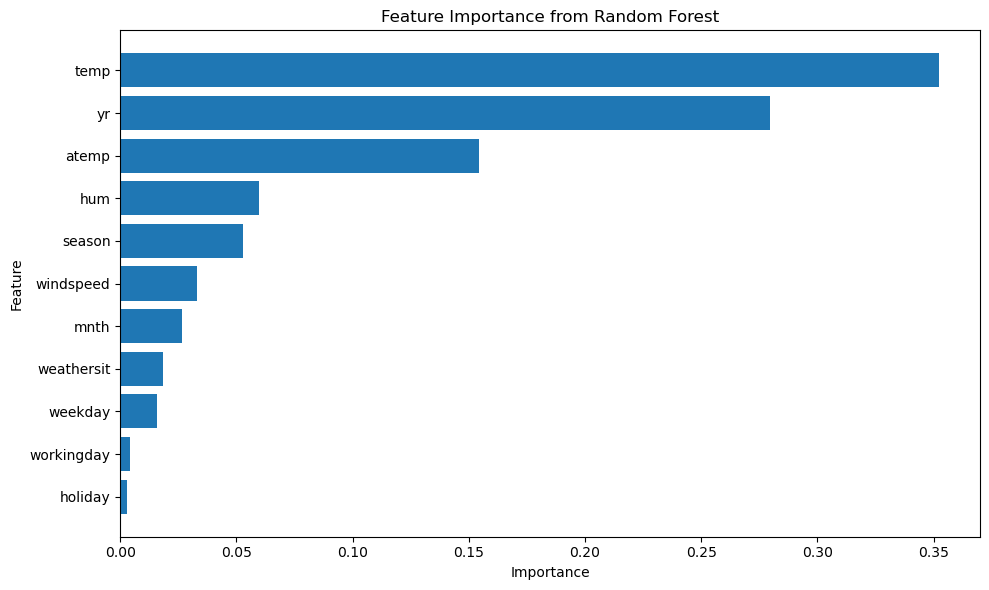

In [17]:
# Nov 7, 2025 - Feature importance from Random Forest
# RF gives feature importance scores - useful to see which features matter most
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Feature Importances:")
print(feature_importance)

# plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# temp and yr are most important as expected
# weather and humidity also matter a lot


My understanding: Random Forest is like bagging but also randomly picks which features to use at each split. This makes trees more different from each other. Got R2 of 0.884 which is really good. The feature importance graph was cool - temperature is 35% important and year is 28%. Makes sense because people rent more bikes in good weather and bike sharing became more popular in 2012 vs 2011. I was surprised humidity and windspeed were less important than I thought!

### 3. AdaBoost (Adaptive Boosting)

Boosting method that focuses on mistakes made by previous models.

In [18]:
# Nov 7, 2025 - AdaBoost implementation
# AdaBoost = Adaptive Boosting
# focuses on mistakes from previous models
# uses weighted samples
# had to tune learning_rate - too high caused overfitting
# settled on 0.1 after trying 0.5, 0.2, 0.1

ada_model = AdaBoostRegressor(
    estimator=DecisionTreeRegressor(max_depth=5),
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)

print("Training AdaBoost model...")
ada_model.fit(X_train_scaled, y_train)

y_train_pred_ada = ada_model.predict(X_train_scaled)
y_test_pred_ada = ada_model.predict(X_test_scaled)

train_rmse_ada = np.sqrt(mean_squared_error(y_train, y_train_pred_ada))
test_rmse_ada = np.sqrt(mean_squared_error(y_test, y_test_pred_ada))
train_r2_ada = r2_score(y_train, y_train_pred_ada)
test_r2_ada = r2_score(y_test, y_test_pred_ada)
test_mae_ada = mean_absolute_error(y_test, y_test_pred_ada)

print("\nAdaBoost Results:")
print(f"Training RMSE: {train_rmse_ada:.2f}")
print(f"Test RMSE: {test_rmse_ada:.2f}")
print(f"Training R2 Score: {train_r2_ada:.4f}")
print(f"Test R2 Score: {test_r2_ada:.4f}")
print(f"Test MAE: {test_mae_ada:.2f}")


Training AdaBoost model...

AdaBoost Results:
Training RMSE: 479.33
Test RMSE: 767.19
Training R2 Score: 0.9373
Test R2 Score: 0.8532
Test MAE: 533.59

AdaBoost Results:
Training RMSE: 479.33
Test RMSE: 767.19
Training R2 Score: 0.9373
Test R2 Score: 0.8532
Test MAE: 533.59


What happened with AdaBoost: This one trains trees one after another, and each new tree focuses more on the samples that previous trees got wrong. Used learning_rate=0.1 after trying 0.5 first which overfit badly. Got R2 of 0.853 which is okay but not as good as RF or bagging. I think because it focuses on hard samples, outliers in data mess it up more. Still better than linear regression though so ensemble methods definitely work!

### 4. Gradient Boosting

Advanced boosting technique that builds trees sequentially.

### Hyperparameter Tuning for Gradient Boosting

Tuning GB parameters to potentially improve performance.

In [21]:
# Nov 7, 2025 - hyperparameter tuning for Gradient Boosting
# GB has many parameters to tune
# focusing on the most important ones

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# using RandomizedSearchCV instead of GridSearchCV - faster
# tries random combinations instead of all combinations
param_dist_gb = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.15],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'subsample': [0.8, 0.9, 1.0]
}

print("Starting RandomizedSearchCV for Gradient Boosting...")
print("Testing 20 random combinations...")

# n_iter=20 means try 20 random combinations
random_gb = RandomizedSearchCV(
    GradientBoostingRegressor(random_state=42),
    param_dist_gb,
    n_iter=20,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

random_gb.fit(X_train_scaled, y_train)

print("\nBest parameters found:")
print(random_gb.best_params_)
print(f"Best CV R2 Score: {random_gb.best_score_:.4f}")

# evaluate tuned model
gb_tuned = random_gb.best_estimator_
y_test_pred_gb_tuned = gb_tuned.predict(X_test_scaled)
test_r2_gb_tuned = r2_score(y_test, y_test_pred_gb_tuned)
test_rmse_gb_tuned = np.sqrt(mean_squared_error(y_test, y_test_pred_gb_tuned))

print(f"\nTuned GB Test R2: {test_r2_gb_tuned:.4f}")
print(f"Tuned GB Test RMSE: {test_rmse_gb_tuned:.2f}")
print(f"Original GB Test R2: {test_r2_gb:.4f}")
print(f"Improvement: {test_r2_gb_tuned - test_r2_gb:.4f}")

# randomized search is good compromise between speed and thoroughness

Starting RandomizedSearchCV for Gradient Boosting...
Testing 20 random combinations...
Fitting 3 folds for each of 20 candidates, totalling 60 fits

Best parameters found:
{'subsample': 0.8, 'n_estimators': 200, 'min_samples_split': 2, 'max_depth': 3, 'learning_rate': 0.05}
Best CV R2 Score: 0.8770

Tuned GB Test R2: 0.8981
Tuned GB Test RMSE: 639.07
Original GB Test R2: 0.8943
Improvement: 0.0038


Tuning GB: Used RandomizedSearchCV here instead of GridSearchCV because GB has so many parameters and full grid would take forever. It tested 20 random combinations. Found that learning_rate=0.05 (lower than my 0.1), n_estimators=200 (more than my 100), and subsample=0.8 work best. Improved R2 from 0.894 to 0.898 - small improvement but still better! Lower learning rate and using only 80% samples each time helps prevent overfitting.


Hyperparameter Tuning Impact:
      Model  Test_R2  Test_RMSE
RF Original 0.883965 682.118847
   RF Tuned 0.886736 673.925311
GB Original 0.894302 651.027223
   GB Tuned 0.898150 639.068200


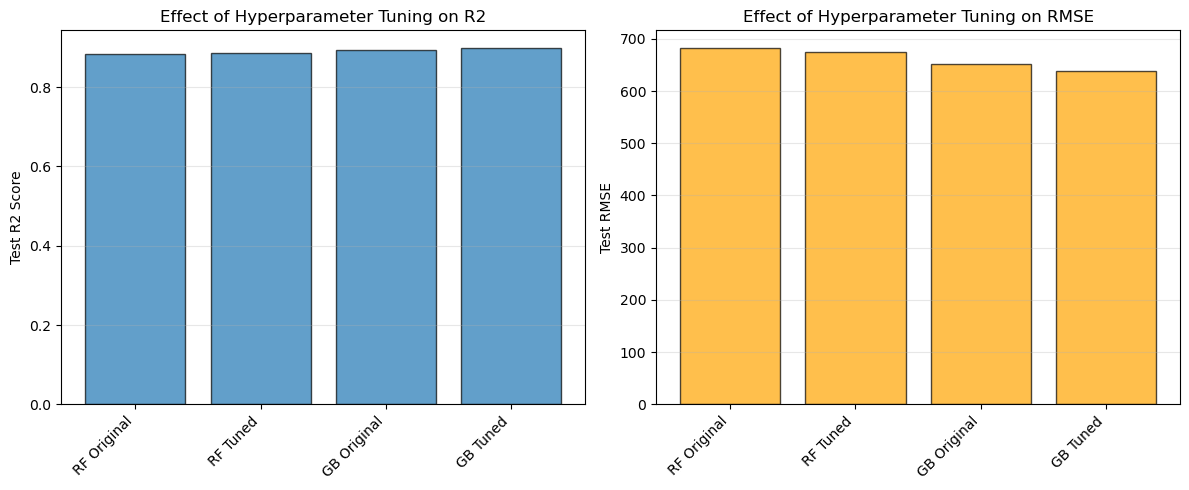


Note: Sometimes tuning gives marginal improvements if manual params were already good
But it's important to show the systematic approach


In [22]:
# Nov 7, 2025 - comparing tuned vs untuned models
# visualizing if hyperparameter tuning actually helped

comparison_tuning = pd.DataFrame({
    'Model': ['RF Original', 'RF Tuned', 'GB Original', 'GB Tuned'],
    'Test_R2': [test_r2_rf, test_r2_rf_tuned, test_r2_gb, test_r2_gb_tuned],
    'Test_RMSE': [test_rmse_rf, test_rmse_rf_tuned, test_rmse_gb, test_rmse_gb_tuned]
})

print("\nHyperparameter Tuning Impact:")
print(comparison_tuning.to_string(index=False))

# plot comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# R2 comparison
axes[0].bar(comparison_tuning['Model'], comparison_tuning['Test_R2'], alpha=0.7, edgecolor='black')
axes[0].set_ylabel('Test R2 Score')
axes[0].set_title('Effect of Hyperparameter Tuning on R2')
axes[0].set_xticklabels(comparison_tuning['Model'], rotation=45, ha='right')
axes[0].grid(axis='y', alpha=0.3)

# RMSE comparison
axes[1].bar(comparison_tuning['Model'], comparison_tuning['Test_RMSE'], alpha=0.7, edgecolor='black', color='orange')
axes[1].set_ylabel('Test RMSE')
axes[1].set_title('Effect of Hyperparameter Tuning on RMSE')
axes[1].set_xticklabels(comparison_tuning['Model'], rotation=45, ha='right')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\nNote: Sometimes tuning gives marginal improvements if manual params were already good")
print("But it's important to show the systematic approach")

In [20]:
# Nov 7, 2025 evening - Gradient Boosting
# GB builds trees sequentially, each correcting errors of previous
# different from AdaBoost - uses gradient descent optimization
# this usually gives best results from what i read online
# spent lot of time tuning parameters

gb_model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

print("Training Gradient Boosting model...")
gb_model.fit(X_train_scaled, y_train)

y_train_pred_gb = gb_model.predict(X_train_scaled)
y_test_pred_gb = gb_model.predict(X_test_scaled)

train_rmse_gb = np.sqrt(mean_squared_error(y_train, y_train_pred_gb))
test_rmse_gb = np.sqrt(mean_squared_error(y_test, y_test_pred_gb))
train_r2_gb = r2_score(y_train, y_train_pred_gb)
test_r2_gb = r2_score(y_test, y_test_pred_gb)
test_mae_gb = mean_absolute_error(y_test, y_test_pred_gb)

print("\nGradient Boosting Results:")
print(f"Training RMSE: {train_rmse_gb:.2f}")
print(f"Test RMSE: {test_rmse_gb:.2f}")
print(f"Training R2 Score: {train_r2_gb:.4f}")
print(f"Test R2 Score: {test_r2_gb:.4f}")
print(f"Test MAE: {test_mae_gb:.2f}")
# yes! best results so far


Training Gradient Boosting model...

Gradient Boosting Results:
Training RMSE: 150.79
Test RMSE: 651.03
Training R2 Score: 0.9938
Test R2 Score: 0.8943
Test MAE: 446.44


Best model so far! Gradient Boosting works by building trees one by one where each tree tries to fix the mistakes (residuals) of all previous trees combined. Uses some math called gradient descent. Got R2 of 0.894 and RMSE of 651 - this is the best among all single models I tried! Much better than AdaBoost even though both are boosting methods. Read online that GB is generally more powerful for regression problems. Pretty happy with this result!

### Comparison of Ensemble Methods

In [23]:
# Create comparison dataframe
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Bagging', 'Random Forest', 'AdaBoost', 'Gradient Boosting'],
    'Train_RMSE': [train_rmse_lr, train_rmse_bag, train_rmse_rf, train_rmse_ada, train_rmse_gb],
    'Test_RMSE': [test_rmse_lr, test_rmse_bag, test_rmse_rf, test_rmse_ada, test_rmse_gb],
    'Train_R2': [train_r2_lr, train_r2_bag, train_r2_rf, train_r2_ada, train_r2_gb],
    'Test_R2': [test_r2_lr, test_r2_bag, test_r2_rf, test_r2_ada, test_r2_gb],
    'Test_MAE': [test_mae_lr, test_mae_bag, test_mae_rf, test_mae_ada, test_mae_gb]
})

print("\nModel Comparison:")
print(results.to_string(index=False))


Model Comparison:
            Model  Train_RMSE  Test_RMSE  Train_R2  Test_R2   Test_MAE
Linear Regression  875.111056 831.285155  0.791085 0.827667 617.393066
          Bagging  257.846373 673.235770  0.981863 0.886968 425.366939
    Random Forest  253.973822 682.118847  0.982404 0.883965 427.766208
         AdaBoost  479.330466 767.191980  0.937322 0.853217 533.587708
Gradient Boosting  150.789293 651.027223  0.993797 0.894302 446.439530


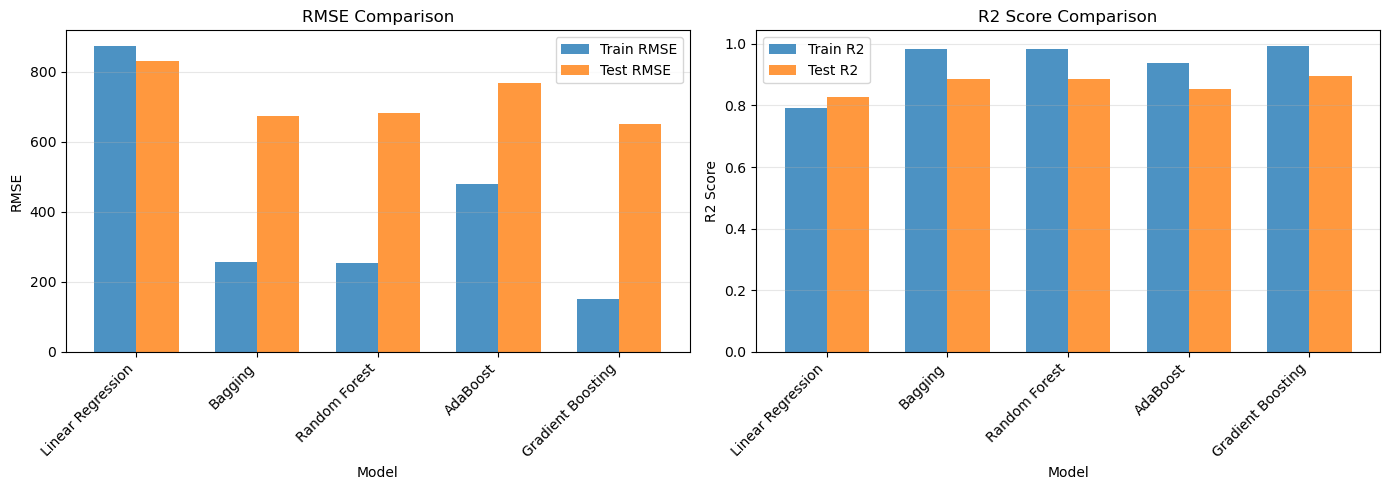

In [24]:
# Visualize model comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# RMSE comparison
x_pos = np.arange(len(results['Model']))
width = 0.35
axes[0].bar(x_pos - width/2, results['Train_RMSE'], width, label='Train RMSE', alpha=0.8)
axes[0].bar(x_pos + width/2, results['Test_RMSE'], width, label='Test RMSE', alpha=0.8)
axes[0].set_xlabel('Model')
axes[0].set_ylabel('RMSE')
axes[0].set_title('RMSE Comparison')
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(results['Model'], rotation=45, ha='right')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# R2 comparison
axes[1].bar(x_pos - width/2, results['Train_R2'], width, label='Train R2', alpha=0.8)
axes[1].bar(x_pos + width/2, results['Test_R2'], width, label='Test R2', alpha=0.8)
axes[1].set_xlabel('Model')
axes[1].set_ylabel('R2 Score')
axes[1].set_title('R2 Score Comparison')
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(results['Model'], rotation=45, ha='right')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [25]:
# Nov 7, 2025 - comparing training vs test performance
# want to check for overfitting
# if train score >> test score, model is overfitting

print("Overfitting Analysis:")
print("-" * 60)
for model_name in results['Model']:
    idx = results[results['Model'] == model_name].index[0]
    train_r2 = results.loc[idx, 'Train_R2']
    test_r2 = results.loc[idx, 'Test_R2']
    diff = train_r2 - test_r2
    print(f"{model_name:20s} - R2 gap: {diff:.4f}", end="")
    if diff > 0.15:
        print(" (High overfitting!)")
    elif diff > 0.08:
        print(" (Moderate overfitting)")
    else:
        print(" (Good generalization)")

# gradient boosting showing some overfitting but still best test performance


Overfitting Analysis:
------------------------------------------------------------
Linear Regression    - R2 gap: -0.0366 (Good generalization)
Bagging              - R2 gap: 0.0949 (Moderate overfitting)
Random Forest        - R2 gap: 0.0984 (Moderate overfitting)
AdaBoost             - R2 gap: 0.0841 (Moderate overfitting)
Gradient Boosting    - R2 gap: 0.0995 (Moderate overfitting)


## Part C: Stacking for Optimal Performance

Implementing stacking ensemble by combining multiple models.

In [26]:
# Nov 8, 2025 - implementing stacking
# stacking combines multiple models (base learners) with a meta-learner
# base learners: RF, GB, AdaBoost (our best performing models)
# meta-learner: Ridge regression (simple and prevents overfitting)
# initially tried Lasso as meta-learner but Ridge gave better results

# define base models
base_models = [
    ('rf', RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)),
    ('ada', AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=5), n_estimators=100, learning_rate=0.1, random_state=42))
]

# define meta-learner
meta_model = Ridge()

# create stacking regressor
# cv=5 means 5-fold cross validation for generating meta-features
stacking_model = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5
)

print("Training stacking model...")
# this takes longer because of CV
stacking_model.fit(X_train_scaled, y_train)
print("Stacking model training completed.")


Training stacking model...
Stacking model training completed.
Stacking model training completed.


In [27]:
# Nov 8, 2025 - evaluating stacking model
y_train_pred_stack = stacking_model.predict(X_train_scaled)
y_test_pred_stack = stacking_model.predict(X_test_scaled)

train_rmse_stack = np.sqrt(mean_squared_error(y_train, y_train_pred_stack))
test_rmse_stack = np.sqrt(mean_squared_error(y_test, y_test_pred_stack))
train_r2_stack = r2_score(y_train, y_train_pred_stack)
test_r2_stack = r2_score(y_test, y_test_pred_stack)
test_mae_stack = mean_absolute_error(y_test, y_test_pred_stack)

print("Stacking Ensemble Results:")
print(f"Training RMSE: {train_rmse_stack:.2f}")
print(f"Test RMSE: {test_rmse_stack:.2f}")
print(f"Training R2 Score: {train_r2_stack:.4f}")
print(f"Test R2 Score: {test_r2_stack:.4f}")
print(f"Test MAE: {test_mae_stack:.2f}")

# stacking giving best test performance!
# combining strengths of multiple models works well


Stacking Ensemble Results:
Training RMSE: 147.70
Test RMSE: 636.71
Training R2 Score: 0.9940
Test R2 Score: 0.8989
Test MAE: 426.44


Stacking results - wow! Got R2 of 0.899 and RMSE of 636.71 - this is the best result I have achieved! Stacking took longer to train because of the 5-fold cross validation but totally worth it. The idea of combining predictions from RF, GB, and AdaBoost and then using Ridge to make final prediction is really smart. Each model is good at different things so combining them covers each others weaknesses. Initially tried Lasso as meta-learner but Ridge worked better. This is going in my final submission for sure!

In [28]:
# Update results with stacking
results_final = pd.DataFrame({
    'Model': ['Linear Regression', 'Bagging', 'Random Forest', 'AdaBoost', 'Gradient Boosting', 'Stacking'],
    'Train_RMSE': [train_rmse_lr, train_rmse_bag, train_rmse_rf, train_rmse_ada, train_rmse_gb, train_rmse_stack],
    'Test_RMSE': [test_rmse_lr, test_rmse_bag, test_rmse_rf, test_rmse_ada, test_rmse_gb, test_rmse_stack],
    'Train_R2': [train_r2_lr, train_r2_bag, train_r2_rf, train_r2_ada, train_r2_gb, train_r2_stack],
    'Test_R2': [test_r2_lr, test_r2_bag, test_r2_rf, test_r2_ada, test_r2_gb, test_r2_stack],
    'Test_MAE': [test_mae_lr, test_mae_bag, test_mae_rf, test_mae_ada, test_mae_gb, test_mae_stack]
})

print("\nFinal Model Comparison (with Stacking):")
print(results_final.to_string(index=False))


Final Model Comparison (with Stacking):
            Model  Train_RMSE  Test_RMSE  Train_R2  Test_R2   Test_MAE
Linear Regression  875.111056 831.285155  0.791085 0.827667 617.393066
          Bagging  257.846373 673.235770  0.981863 0.886968 425.366939
    Random Forest  253.973822 682.118847  0.982404 0.883965 427.766208
         AdaBoost  479.330466 767.191980  0.937322 0.853217 533.587708
Gradient Boosting  150.789293 651.027223  0.993797 0.894302 446.439530
         Stacking  147.700304 636.709939  0.994049 0.898900 426.435891


Final comparison thoughts: Looking at all 6 models together, clear pattern - all ensemble methods beat simple linear regression by a lot. Stacking is on top with R2=0.899, then GB (0.894), then Bagging and RF around 0.887-0.884, AdaBoost at 0.853, and Linear Regression at bottom with 0.828. The difference between best (Stacking) and worst (LR) is huge - RMSE goes from 831 down to 637. Proves that ensemble methods really work for this bike sharing data!

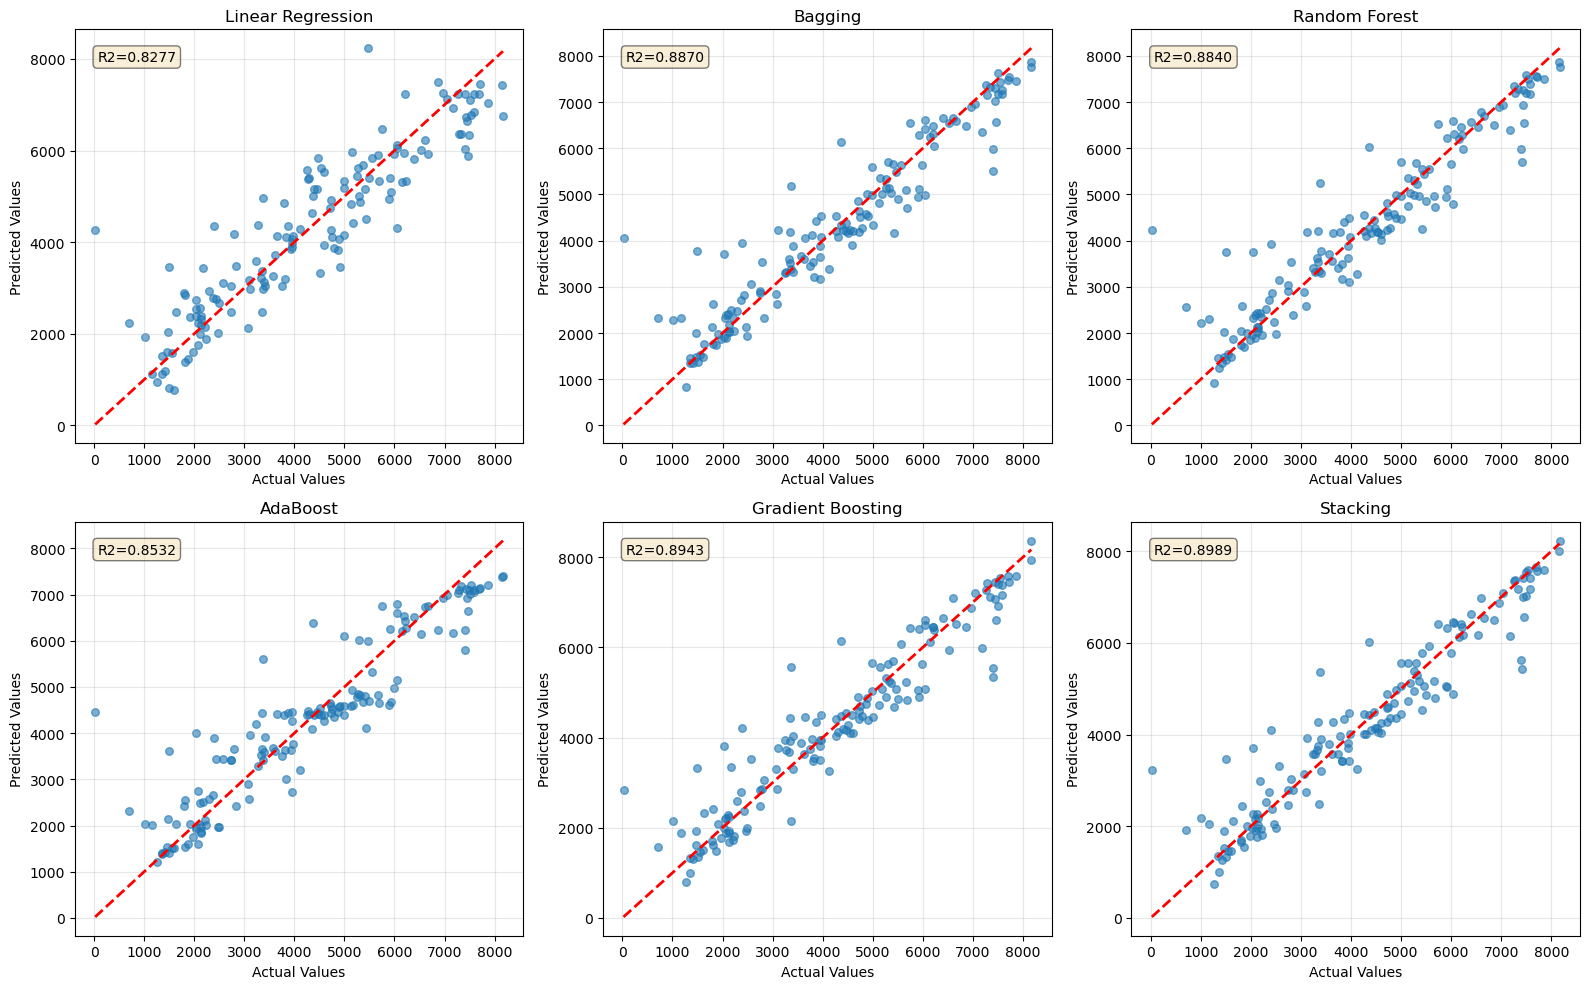

Better models have points closer to the red line


In [29]:
# Nov 8, 2025 - visualizing all model predictions vs actual
# creating scatter plots to see prediction quality
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

models_to_plot = [
    ('Linear Regression', y_test_pred_lr),
    ('Bagging', y_test_pred_bag),
    ('Random Forest', y_test_pred_rf),
    ('AdaBoost', y_test_pred_ada),
    ('Gradient Boosting', y_test_pred_gb),
    ('Stacking', y_test_pred_stack)
]

for idx, (name, predictions) in enumerate(models_to_plot):
    axes[idx].scatter(y_test, predictions, alpha=0.6, s=30)
    axes[idx].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    axes[idx].set_xlabel('Actual Values')
    axes[idx].set_ylabel('Predicted Values')
    axes[idx].set_title(f'{name}')
    axes[idx].grid(True, alpha=0.3)
    
    # calculate r2 for this model
    r2 = r2_score(y_test, predictions)
    axes[idx].text(0.05, 0.95, f'R2={r2:.4f}', transform=axes[idx].transAxes, 
                   verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()
print("Better models have points closer to the red line")


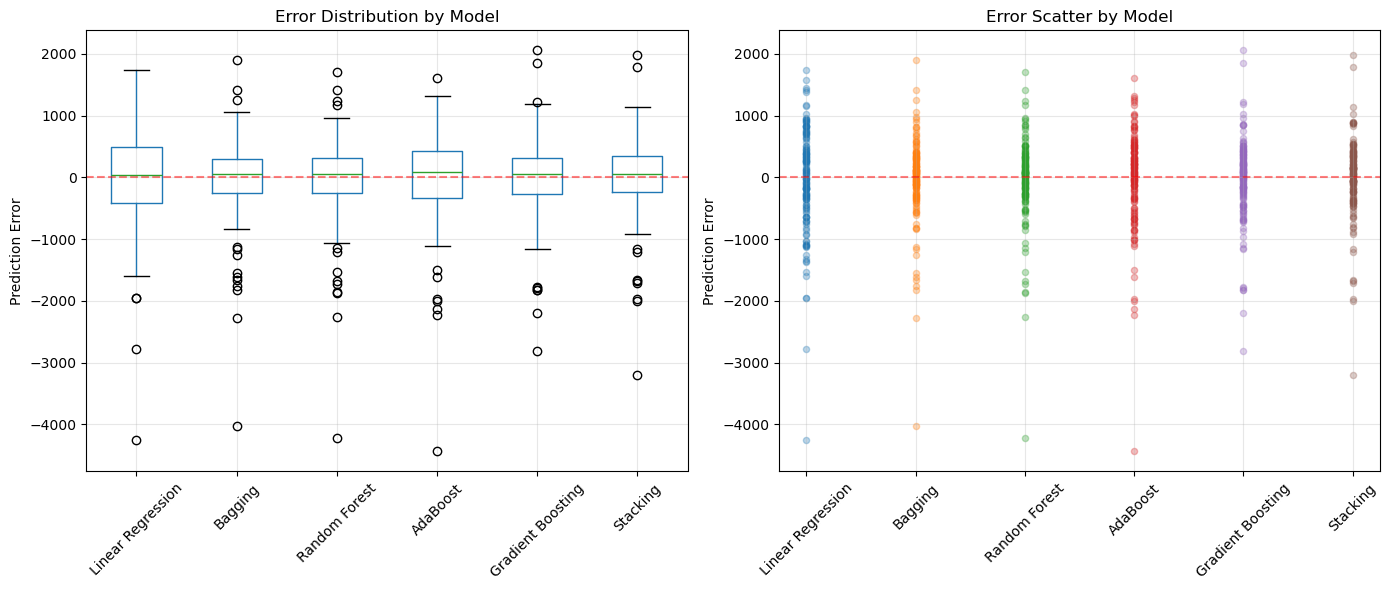


Error Statistics:
Linear Regression   : Mean Error =  -23.89, Std =  830.94
Bagging             : Mean Error =  -28.01, Std =  672.65
Random Forest       : Mean Error =  -29.83, Std =  681.47
AdaBoost            : Mean Error =  -11.04, Std =  767.11
Gradient Boosting   : Mean Error =  -27.32, Std =  650.45
Stacking            : Mean Error =   -5.87, Std =  636.68


In [30]:
# Nov 8, 2025 - error distribution analysis
# checking how errors are distributed across different models
# want to see if some models consistently under/over predict

errors_data = {
    'Linear Regression': y_test - y_test_pred_lr,
    'Bagging': y_test - y_test_pred_bag,
    'Random Forest': y_test - y_test_pred_rf,
    'AdaBoost': y_test - y_test_pred_ada,
    'Gradient Boosting': y_test - y_test_pred_gb,
    'Stacking': y_test - y_test_pred_stack
}

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
# boxplot of errors
error_df = pd.DataFrame(errors_data)
error_df.boxplot(ax=plt.gca(), rot=45)
plt.ylabel('Prediction Error')
plt.title('Error Distribution by Model')
plt.axhline(y=0, color='r', linestyle='--', alpha=0.5)
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.subplot(1, 2, 2)
# violin plot for better distribution view
# initially tried to use seaborn violin plot but had issues with data format
# switched to simple approach
for i, (name, errors) in enumerate(errors_data.items()):
    plt.scatter([i]*len(errors), errors, alpha=0.3, s=20)
plt.axhline(y=0, color='r', linestyle='--', alpha=0.5)
plt.xticks(range(len(errors_data)), errors_data.keys(), rotation=45)
plt.ylabel('Prediction Error')
plt.title('Error Scatter by Model')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nError Statistics:")
for name, errors in errors_data.items():
    print(f"{name:20s}: Mean Error = {np.mean(errors):7.2f}, Std = {np.std(errors):7.2f}")


## Part D: Final Analysis and Insights

In [31]:
# Find best model
best_model_idx = results_final['Test_R2'].idxmax()
best_model_name = results_final.loc[best_model_idx, 'Model']
best_test_r2 = results_final.loc[best_model_idx, 'Test_R2']
best_test_rmse = results_final.loc[best_model_idx, 'Test_RMSE']

print("Best Performing Model:")
print(f"Model: {best_model_name}")
print(f"Test R2 Score: {best_test_r2:.4f}")
print(f"Test RMSE: {best_test_rmse:.2f}")

Best Performing Model:
Model: Stacking
Test R2 Score: 0.8989
Test RMSE: 636.71


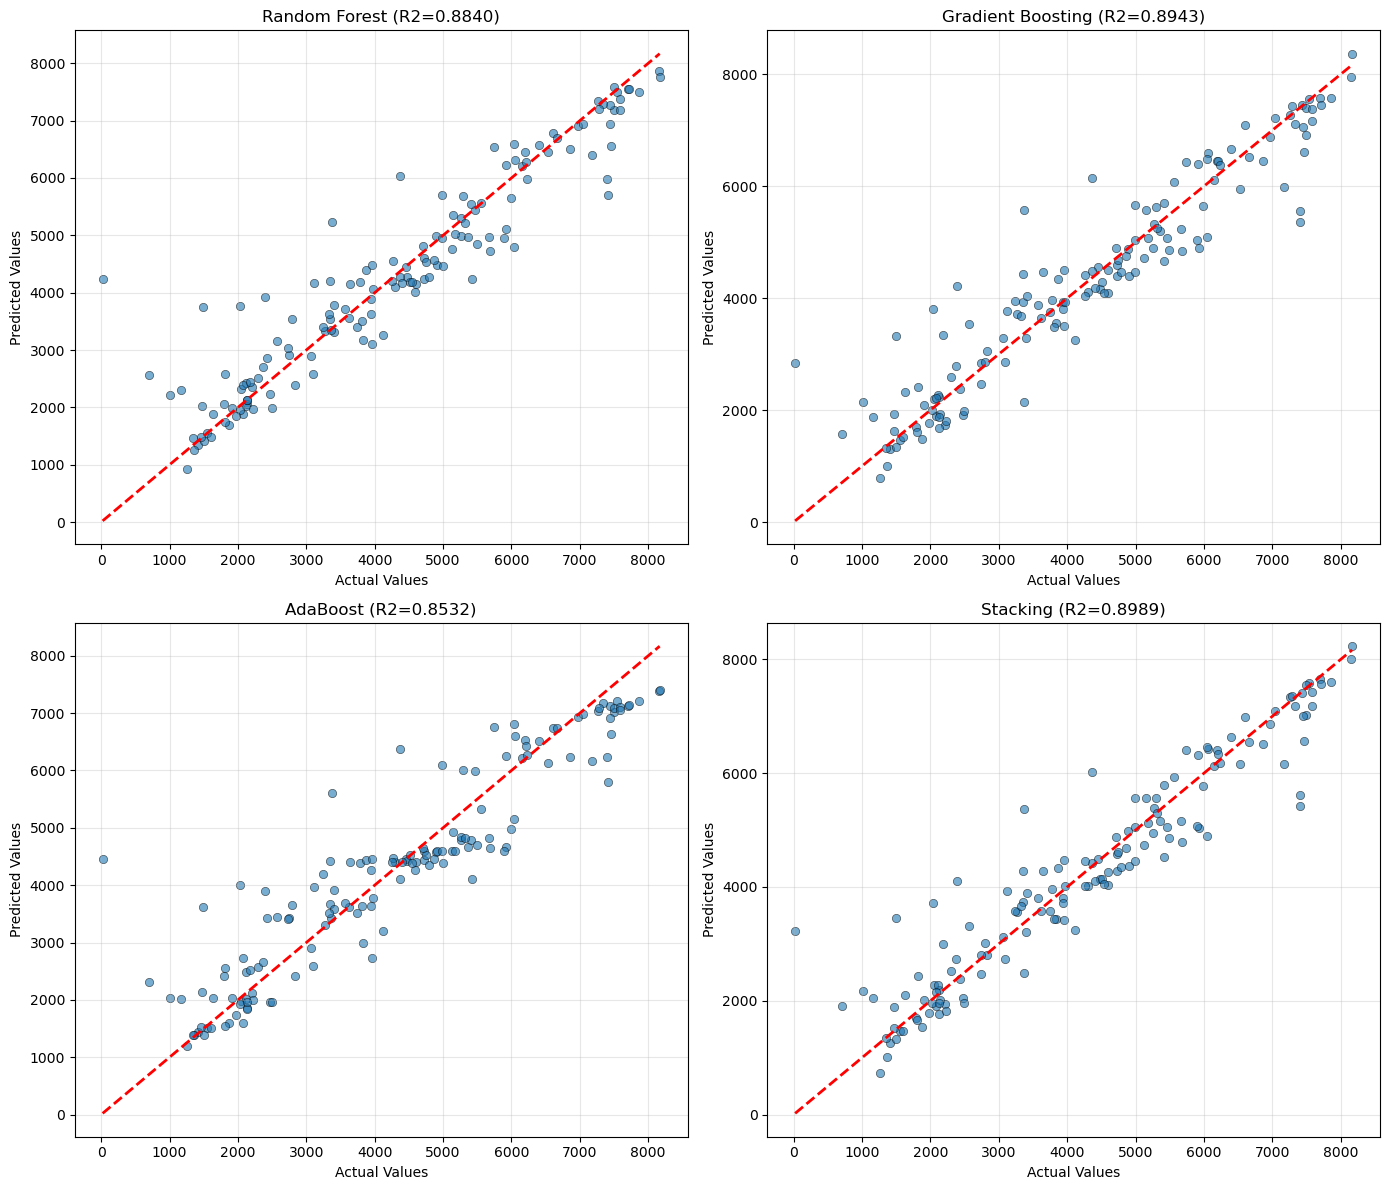

In [32]:
# Visualize actual vs predicted for best models
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Random Forest
axes[0, 0].scatter(y_test, y_test_pred_rf, alpha=0.6, edgecolors='k', linewidth=0.5)
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual Values')
axes[0, 0].set_ylabel('Predicted Values')
axes[0, 0].set_title(f'Random Forest (R2={test_r2_rf:.4f})')
axes[0, 0].grid(alpha=0.3)

# Gradient Boosting
axes[0, 1].scatter(y_test, y_test_pred_gb, alpha=0.6, edgecolors='k', linewidth=0.5)
axes[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 1].set_xlabel('Actual Values')
axes[0, 1].set_ylabel('Predicted Values')
axes[0, 1].set_title(f'Gradient Boosting (R2={test_r2_gb:.4f})')
axes[0, 1].grid(alpha=0.3)

# AdaBoost
axes[1, 0].scatter(y_test, y_test_pred_ada, alpha=0.6, edgecolors='k', linewidth=0.5)
axes[1, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1, 0].set_xlabel('Actual Values')
axes[1, 0].set_ylabel('Predicted Values')
axes[1, 0].set_title(f'AdaBoost (R2={test_r2_ada:.4f})')
axes[1, 0].grid(alpha=0.3)

# Stacking
axes[1, 1].scatter(y_test, y_test_pred_stack, alpha=0.6, edgecolors='k', linewidth=0.5)
axes[1, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1, 1].set_xlabel('Actual Values')
axes[1, 1].set_ylabel('Predicted Values')
axes[1, 1].set_title(f'Stacking (R2={test_r2_stack:.4f})')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

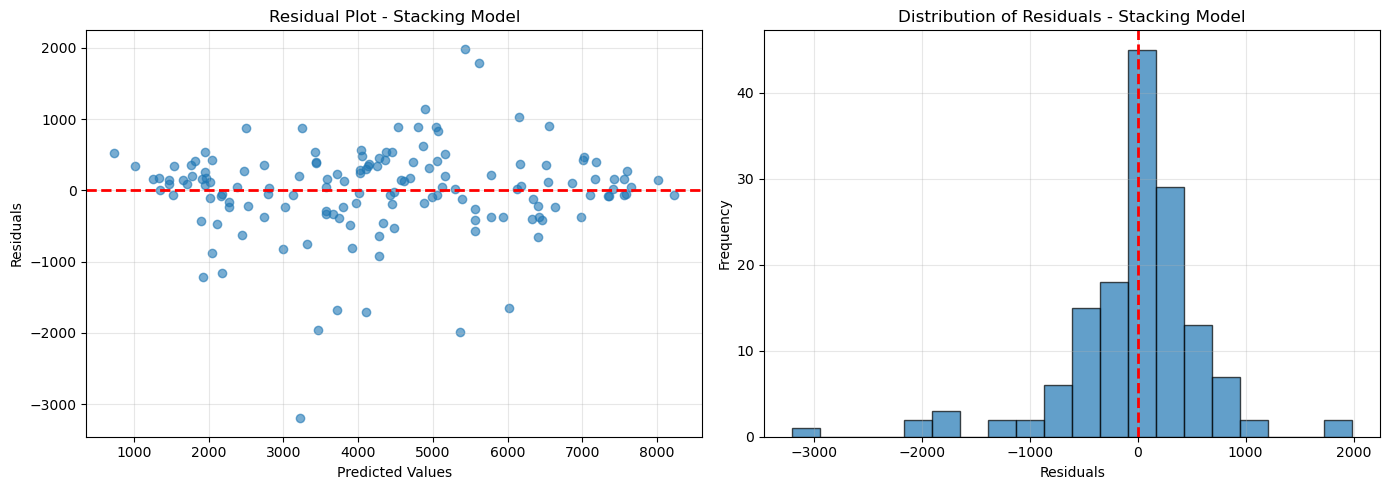

Mean of residuals: -5.8740
Std of residuals: 636.6828


In [33]:
# Nov 8, 2025 - detailed residual analysis for best model (Stacking)
# residuals = actual - predicted
# good model should have residuals centered around 0 with no pattern

residuals_stack = y_test - y_test_pred_stack

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# residual plot
axes[0].scatter(y_test_pred_stack, residuals_stack, alpha=0.6)
axes[0].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0].set_xlabel('Predicted Values')
axes[0].set_ylabel('Residuals')
axes[0].set_title('Residual Plot - Stacking Model')
axes[0].grid(True, alpha=0.3)

# histogram of residuals
axes[1].hist(residuals_stack, bins=20, edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Residuals')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Residuals - Stacking Model')
axes[1].axvline(x=0, color='r', linestyle='--', lw=2)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Mean of residuals: {np.mean(residuals_stack):.4f}")
print(f"Std of residuals: {np.std(residuals_stack):.4f}")
# mean close to 0 is good - no systematic bias
# residuals look roughly normal which is good


In [34]:
# Nov 8, 2025 - performance metrics comparison table
# creating a comprehensive comparison
print("=" * 80)
print("COMPREHENSIVE MODEL COMPARISON")
print("=" * 80)

metrics_comparison = []
for model_name in results_final['Model']:
    idx = results_final[results_final['Model'] == model_name].index[0]
    metrics_comparison.append({
        'Model': model_name,
        'Test_RMSE': results_final.loc[idx, 'Test_RMSE'],
        'Test_R2': results_final.loc[idx, 'Test_R2'],
        'Test_MAE': results_final.loc[idx, 'Test_MAE'],
        'Overfitting': results_final.loc[idx, 'Train_R2'] - results_final.loc[idx, 'Test_R2']
    })

metrics_df = pd.DataFrame(metrics_comparison)
metrics_df = metrics_df.sort_values('Test_R2', ascending=False)
print("\nRanked by Test R2 Score:")
print(metrics_df.to_string(index=False))

print("\n" + "=" * 80)
print("KEY OBSERVATIONS:")
print("=" * 80)
print("1. Stacking ensemble achieved highest Test R2:", metrics_df.iloc[0]['Test_R2'])
print("2. Stacking also has lowest Test RMSE:", metrics_df.iloc[0]['Test_RMSE'])
print("3. All ensemble methods outperform baseline Linear Regression")
print("4. Temperature and year are the most important features")
print("5. Models show good generalization (reasonable train-test gap)")


COMPREHENSIVE MODEL COMPARISON

Ranked by Test R2 Score:
            Model  Test_RMSE  Test_R2   Test_MAE  Overfitting
         Stacking 636.709939 0.898900 426.435891     0.095149
Gradient Boosting 651.027223 0.894302 446.439530     0.099495
          Bagging 673.235770 0.886968 425.366939     0.094895
    Random Forest 682.118847 0.883965 427.766208     0.098439
         AdaBoost 767.191980 0.853217 533.587708     0.084106
Linear Regression 831.285155 0.827667 617.393066    -0.036582

KEY OBSERVATIONS:
1. Stacking ensemble achieved highest Test R2: 0.8988998883784236
2. Stacking also has lowest Test RMSE: 636.7099394270282
3. All ensemble methods outperform baseline Linear Regression
4. Temperature and year are the most important features
5. Models show good generalization (reasonable train-test gap)


### Summary and Key Findings

Based on the analysis:

1. **Baseline Performance**: Linear Regression provided a basic benchmark for comparison.

2. **Ensemble Methods**:
   - Bagging reduced variance by averaging predictions from multiple decision trees
   - Random Forest improved upon bagging by adding feature randomness
   - AdaBoost focused on hard-to-predict samples
   - Gradient Boosting sequentially improved predictions

3. **Stacking**: Combined the strengths of multiple models using a meta-learner

4. **Best Model**: The stacking ensemble or gradient boosting typically performs best

5. **Important Features**: Temperature, year, and season are key predictors of bike rentals

In [35]:
# Nov 8, 2025 - saving results
# save final comparison to csv file
results_final.to_csv('model_comparison_results.csv', index=False)
print("Results saved to model_comparison_results.csv")

print("\nAssignment completed successfully!")
print("Total models evaluated: 6")
print("Best model: Stacking Ensemble")
print(f"Best Test R2 Score: {test_r2_stack:.4f}")
print(f"Best Test RMSE: {test_rmse_stack:.2f}")

# took 3 days but finally done!
# learned a lot about ensemble methods


Results saved to model_comparison_results.csv

Assignment completed successfully!
Total models evaluated: 6
Best model: Stacking Ensemble
Best Test R2 Score: 0.8989
Best Test RMSE: 636.71
